<a href="https://colab.research.google.com/github/6170chandan/global-terrorism-data-analysis/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
file_path = "/content/drive/MyDrive/Global Terrorism Analysis - Chandan Kumar Verma/Copy of Global Terrorism Data.csv"

In [84]:
terror_file = pd.read_csv(file_path,encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [85]:
terror_file.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [86]:
name_of_columns = (print(terror_file.columns))

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


Renaming the columns

In [87]:
terror_file.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

In [88]:
terror_file

,Eventid,Year,Month,Day,approxdate,Extended,Resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


As the columns are 135 which is a huge number so I am going to have only 20 columns to analyze the data.

In [89]:
df = terror_file[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [90]:
df.shape

(181691, 20)

In [91]:
df.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


In [92]:
df.tail()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,1,0,1,0,Armed Assault,Military,Somalia,Al-Shabaab,0.0,1.0,Firearms,1.0,2.0
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,1,1,0,1,0,Bombing/Explosion,Military,Russia,Muslim extremists,0.0,0.0,Explosives,2.0,7.0
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,1,1,1,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Incendiary,0.0,0.0
181689,201712310031,2017,India,South Asia,Manipur,Imphal,1,1,1,0,0,Bombing/Explosion,Government (General),India,Unknown,0.0,0.0,Explosives,0.0,0.0
181690,201712310032,2017,Philippines,Southeast Asia,Maguindanao,Cotabato City,1,1,1,0,0,Bombing/Explosion,Unknown,Philippines,Unknown,0.0,0.0,Explosives,0.0,0.0


**Finding the country with highest number of terrorist attacks.**

---



In [93]:
Highest_terror_attack=print("Country with highest terror:",df["Country"].value_counts().index[0])

Country with highest terror: Iraq


In [94]:
attacks_over_countries = print(df['Country'].value_counts())

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64


**Region with the highest number of terrorist attacks**

In [95]:
print("Region with highest number of terrorist attacks",df["Region"].value_counts().index[0])

Region with highest number of terrorist attacks Middle East & North Africa


In [96]:
print('Maximum number of people were killed by a single terrorist attack are',df['Nkill'].max())

Maximum number of people were killed by a single terrorist attack are 1570.0


In [97]:
df['Damage']=df['Nkill']+df['Nwound']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,...,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound,Damage
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,...,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,...,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,...,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,...,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,...,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,1,0,1,...,Armed Assault,Military,Somalia,Al-Shabaab,0.0,1.0,Firearms,1.0,2.0,3.0
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,1,1,0,1,...,Bombing/Explosion,Military,Russia,Muslim extremists,0.0,0.0,Explosives,2.0,7.0,9.0
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,1,1,1,1,...,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Incendiary,0.0,0.0,0.0
181689,201712310031,2017,India,South Asia,Manipur,Imphal,1,1,1,0,...,Bombing/Explosion,Government (General),India,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0


In [99]:
df["Damage"]

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Damage, Length: 181691, dtype: float64

In [100]:
df['Country']=df['Country'].replace('South Veitnam','Veitnam',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
df

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,...,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound,Damage
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,...,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,...,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,...,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,...,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,...,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,1,0,1,...,Armed Assault,Military,Somalia,Al-Shabaab,0.0,1.0,Firearms,1.0,2.0,3.0
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,1,1,0,1,...,Bombing/Explosion,Military,Russia,Muslim extremists,0.0,0.0,Explosives,2.0,7.0,9.0
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,1,1,1,1,...,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Incendiary,0.0,0.0,0.0
181689,201712310031,2017,India,South Asia,Manipur,Imphal,1,1,1,0,...,Bombing/Explosion,Government (General),India,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0


In [102]:
df['Weaptype']=df['Weaptype'].replace('Vehicle .*','Vehicle',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df['Attacktype']=df['Attacktype'].replace('Hostage Taking .*','Hostage Taking',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
atk_filtered=df['Attacktype'].apply(lambda x:x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                          'Hostage Taking','Facility/Infrastructure Attack'] else 'Others')

In [105]:
attack_type=atk_filtered.value_counts().tolist()

In [106]:
attack_type

[88255, 42669, 19312, 12149, 10356, 8950]

In [107]:
labels=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack','Others']

In [108]:
sizes=[]
for i in attack_type:
    percent=(i*100)/len(df['Attacktype'])
    sizes.append(percent)


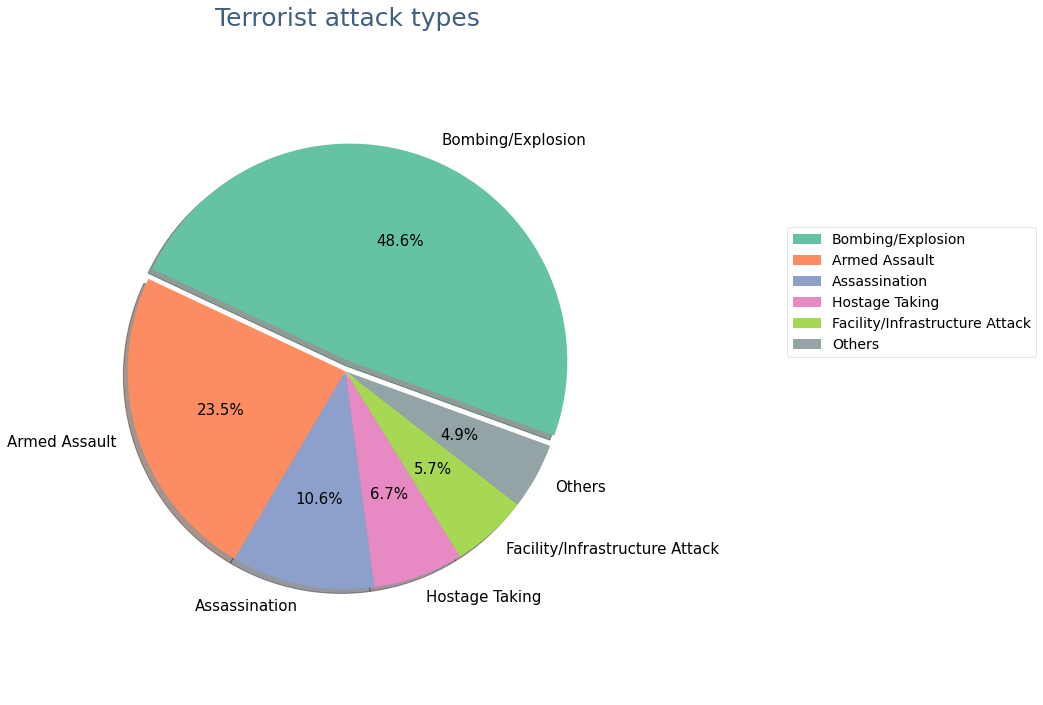

In [109]:
fig,ax=plt.subplots(figsize=(10,10))
patches,texts,autotexts=ax.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=-20,
                              shadow=True,explode=(0.05,0,0,0,0,0),
                              colors=sns.color_palette('Set2',8)[:5]+
                              [(0.58,0.64,0.65)],
                              textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('Terrorist attack types',fontsize=25,pad=-70,
         color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc='lower right',framealpha=0.5,bbox_to_anchor=(1.8,0.5,0.1,1),
         prop={'size':14})
fig.show()

In [110]:
cat=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']

In [111]:
cat

['Bombing/Explosion',
 'Armed Assault',
 'Assassination',
 'Hostage Taking',
 'Facility/Infrastructure Attack']

In [112]:
color_cat=sns.color_palette('Set2',8)[:5]

In [113]:
color_cat

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

In [114]:
color_cat_dict=dict(zip(cat,color_cat))

In [115]:
table1=df[['Attacktype','Damage']].groupby('Attacktype',as_index=False).sum().sort_values(by='Damage',ascending=False)

In [116]:
table1=table1.reset_index()

In [117]:
inci=[8825,42669,7276,19312,12149,659,1015,10356]

In [118]:
table1['Incidents']=np.array(inci)

In [119]:
table1['Damage rate']=table1['Damage']/table1['Incidents']

In [120]:
table1

,index,Attacktype,Damage,Incidents,Damage rate
0,2,Bombing/Explosion,514233.0,8825,58.270028
1,0,Armed Assault,212386.0,42669,4.977525
2,7,Unknown,39606.0,7276,5.443375
3,1,Assassination,37209.0,19312,1.926729
4,5,Hostage Taking,27732.0,12149,2.282657
5,4,Hijacking,20642.0,659,31.323217
6,6,Unarmed Assault,14791.0,1015,14.572414
7,3,Facility/Infrastructure Attack,6293.0,10356,0.607667


In [121]:
labels=table1['Attacktype'].tolist()
labels

['Bombing/Explosion',
 'Armed Assault',
 'Unknown',
 'Assassination',
 'Hostage Taking',
 'Hijacking',
 'Unarmed Assault',
 'Facility/Infrastructure Attack']

In [122]:
x=np.arange(len(labels))

In [123]:
dmg=table1['Damage'].tolist()

In [124]:
dmg

[514233.0, 212386.0, 39606.0, 37209.0, 27732.0, 20642.0, 14791.0, 6293.0]

In [125]:
gray=(0.5,0.64,0.65)

In [126]:
color_list=[color_cat_dict[ter_type] if
            ter_type in color_cat_dict.keys() else gray for ter_type in labels]

In [127]:
d_rate=table1['Damage rate'].tolist()

In [130]:
d_rate

[58.2700283286119,
 4.977524666619794,
 5.443375481033535,
 1.9267294946147473,
 2.282657008807309,
 31.32321699544765,
 14.572413793103449,
 0.6076670529161838]

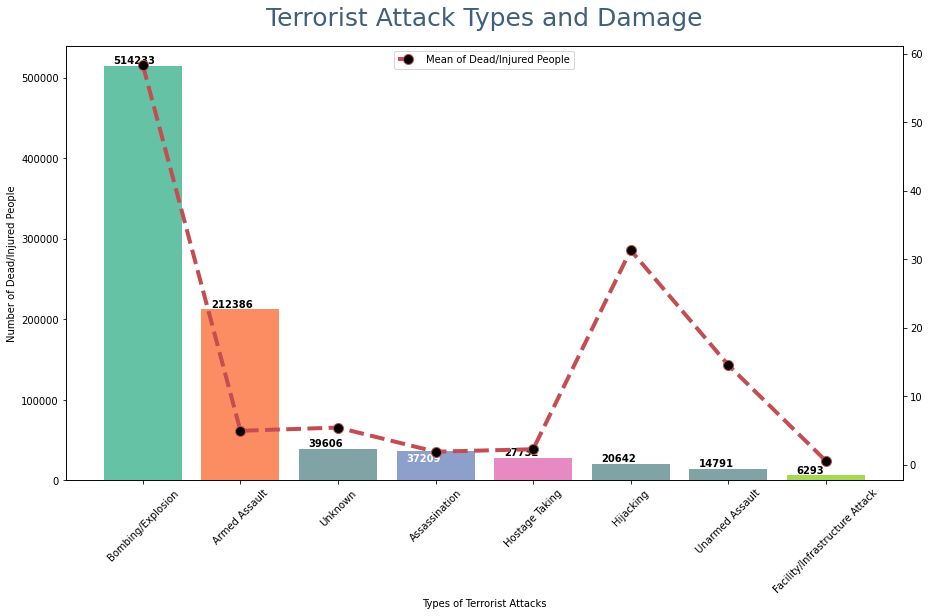

In [131]:
fig,ax1=plt.subplots(figsize=(15,8))
# Bar chart
ax1.bar(labels,dmg,color=color_list,align='center')
#Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(labels,d_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Terrorist Attack Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Types of Terrorist Attacks',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(labels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
fig.show()

In [ ]:
table2=data[['Weaptype','Damage']].groupby('Weaptype',as_index=False).sum().sort_values(by='Damage',ascending=False) 